In [2]:
# Imports
import pykep as pk
import pygmo as pg
import numpy as np

# Plotting imports
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

Problem name: <class 'pykep.trajopt._pl2pl_N_impulses.pl2pl_N_impulses'>
	C++ class name: class pybind11::object

	Global dimension:			7
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [11343, 30, 0.001, 0, 0, ... ]
	Upper bounds: [12439, 100, 0.999, 1, 1, ... ]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none

Total DV (m/s):  13276.681927877544
Dvs (m/s):  [np.float64(0.0), 5645.235430679862, 7631.446497197681]
Tofs (days):  [np.float64(0.16714035793275708), np.float64(99.83285964206723)]


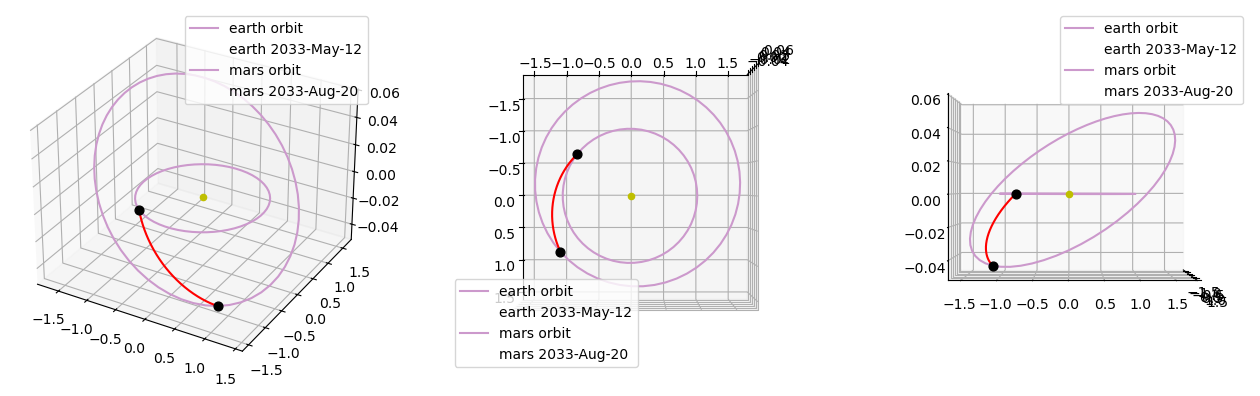

In [8]:

# We define the optimization problem
udp = pk.trajopt.pl2pl_N_impulses(
    start=pk.planet.jpl_lp('earth'),
    target=pk.planet.jpl_lp('mars'),
    N_max=3,
    tof=[30., 100.],
    vinf=[0., 4],
    phase_free=False,
    multi_objective=False,
    t0=[(pk.epoch_from_string('2031-01-20 23:59:54.003')), (pk.epoch_from_string('2034-01-20 23:59:54.003'))])
# All pykep problems in the module trajopt are compatible with pygmo.
# So we create a pygmo problem from the pykep udp (User Defined Problem)
prob = pg.problem(udp)
print(prob)
# Here we define the solution strategy, which in this simple case is to use
# Covariance Matrix adaptation Evolutionary Strategy (CMA-ES)
uda = pg.cmaes(gen=1000, force_bounds = True)
algo = pg.algorithm(uda)
# Here we activate some degree of screen output (will only show in the terminal)
algo.set_verbosity(10)
# We construct a random population of 20 individuals (the initial guess)
pop = pg.population(prob, size = 20, seed = 123)
# We solve the problem
pop = algo.evolve(pop)
# Plot our trajectory
fig = plt.figure(figsize = (16,5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax1 = udp.plot(pop.champion_x, axes = ax1)
ax2 = udp.plot(pop.champion_x, axes = ax2)
ax2.view_init(elev=90, azim=0)
ax3 = udp.plot(pop.champion_x, axes = ax3)
ax3.view_init(elev=0, azim=0)
udp.pretty(pop.champion_x)

NameError: name 'lambert_problem' is not defined

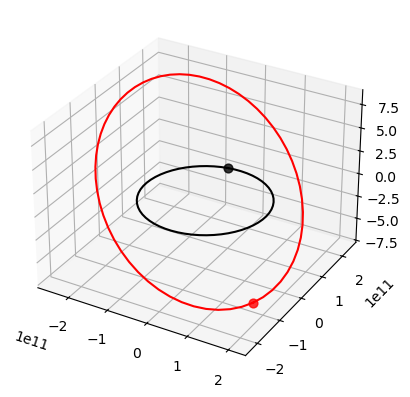

In [16]:


#arrival at Mars
import pykep as pk
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

t1 = pk.epoch(0)
t2 = pk.epoch(640)
dt = (t2.mjd2000 - t1.mjd2000) * pk.DAY2SEC

pl = pk.planet.jpl_lp('earth')
pk.orbit_plots.plot_planet(pl, t0=t1, axes=ax, color='k')
rE,vE = pl.eph(t1)

pl = pk.planet.jpl_lp('mars')
pk.orbit_plots.plot_planet(pl, t0=t2, axes=ax, color='r')
rM, vM = pl.eph(t2)

l = lambert_problem(rE,rM,dt,pk.MU_SUN)
pk.orbit_plots.plot_lambert(l, ax=ax, color='b')
pk.orbit_plots.plot_lambert(l, sol=1, axes=ax, color='g')
pk.orbit_plots.plot_lambert(l, sol=2, axes=ax, color='g', legend = True)

plt.show()

TypeError: plot_planet() got an unexpected keyword argument 'ax'

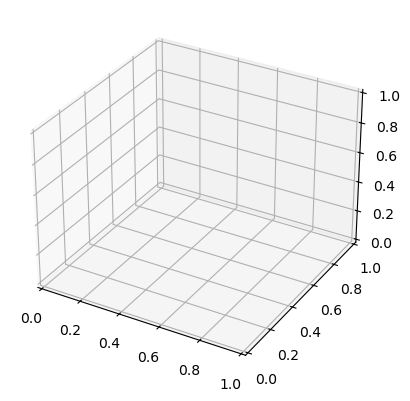

In [ ]:
import pykep as pk
import matplotlib.pyplot as plt

fig = plt.figure()
fig = plt.figure(figsize = (16,5))
ax = fig.add_subplot(projection = '3d')
pl = pk.planet.jpl_lp('earth')
t_plot = pk.epoch(219)
ax = pk.orbit_plots.plot_planet(pl, ax = ax, color='b')